# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as st
import statsmodels.stats.api as sms

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/WhoaaaItsDavid/anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


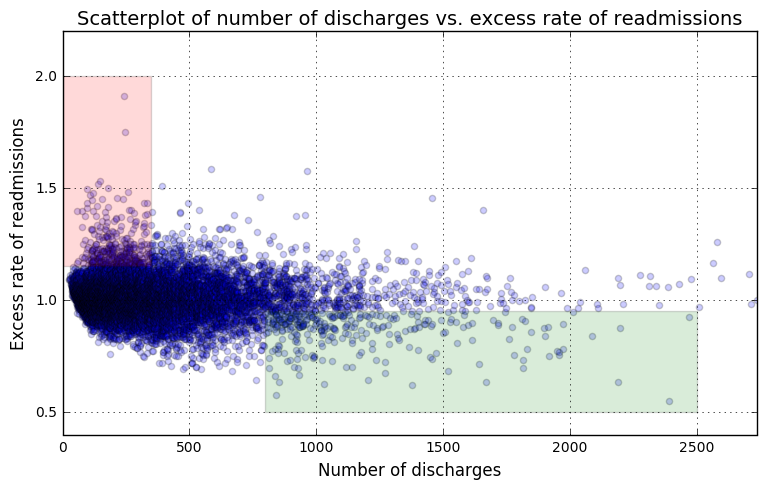

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

# Complete the following:

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

# Preliminary Analysis

In [5]:
# Display the data
clean_hospital_read_df.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


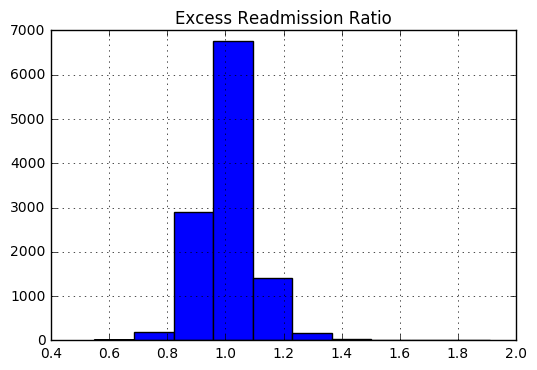

In [6]:
# Is the Excess Readmission Ratio in question normally distributed?
pd.DataFrame.hist(clean_hospital_read_df, column='Excess Readmission Ratio');

In [7]:
# Further clean the data to exclude null excess readmission ratios
# Show descriptive stats
clean_hospital_read_df = clean_hospital_read_df[np.logical_not(clean_hospital_read_df['Excess Readmission Ratio'].isnull())]
print('Number of samples: {}'.format(len(clean_hospital_read_df)))
print('Mean excess readmission ratio: {:.4f}'.format(clean_hospital_read_df['Excess Readmission Ratio'].mean()))

Number of samples: 11497
Mean excess readmission ratio: 1.0075


# B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

Let's inspect the above statistical claims: <li>In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1. <li> In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1.

In [8]:
df_less_100 = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] < 100) & (clean_hospital_read_df['Number of Discharges'] > 0)]
print('Number of samples with < 100 discharges: {}'.format(len(df_less_100)))
print('Mean excess readmission rate: {:.3f}'.format(df_less_100['Excess Readmission Ratio'].mean()))
print('Percent excess readmission rate > 1: {:.2f}%'.format((len(df_less_100[df_less_100['Excess Readmission Ratio'] > 1]) 
                                                             / len(df_less_100)) * 100))

df_great_1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
print('\nNumber of samples with > 1000 discharges: {}'.format(len(df_great_1000)))
print('Mean excess readmission rate: {:.3f}'.format(df_great_1000['Excess Readmission Ratio'].mean()))
print('Percent excess readmission rate > 1: {:.2f}%'.format((len(df_great_1000[df_great_1000['Excess Readmission Ratio'] > 1]) 
                                                             / len(df_great_1000)) * 100))

Number of samples with < 100 discharges: 1188
Mean excess readmission rate: 1.023
Percent excess readmission rate > 1: 63.22%

Number of samples with > 1000 discharges: 463
Mean excess readmission rate: 0.978
Percent excess readmission rate > 1: 44.49%


The claims above hold true, but the real questions are: <li> Is the mean excess readmission rate for samples with less than 100 discharges truly greater than the population mean excess readmision rate?  
H<sub>0</sub>: $M$<sub>pop</sub> = $M$<sub>< 100</sub>  
H<sub>1</sub>: $M$<sub>pop</sub> < $M$<sub>< 100</sub>
<li> Is the mean excess readmission rate for samples with greater than 1000 discharges truly less than the population mean excess readmision rate?  
H<sub>0</sub>: $M$<sub>pop</sub> = $M$<sub>> 1000</sub>  
H<sub>1</sub>: $M$<sub>pop</sub> > $M$<sub>> 1000</sub> 
 
With an alpha = 0.01, let's explore these points below:

In [9]:
two_sample = st.ttest_ind(df_less_100['Excess Readmission Ratio'], 
                          clean_hospital_read_df['Excess Readmission Ratio'])
cm = sms.CompareMeans(sms.DescrStatsW(df_less_100['Excess Readmission Ratio']), 
                      sms.DescrStatsW(clean_hospital_read_df['Excess Readmission Ratio']))

print('The 99% confidence interval about the mean difference is ({:.3f}, {:.3f}).'.format(cm.tconfint_diff(alpha = 0.01, usevar='unequal')[0],
                                                                                          cm.tconfint_diff(alpha = 0.01, usevar='unequal')[1]))
print('The t-statistic is %.3f and the p-value is %.8f.' % two_sample)

The 99% confidence interval about the mean difference is (0.010, 0.020).
The t-statistic is 5.552 and the p-value is 0.00000003.


Given the 99% confidence interval, t-statistic, and p-value of the one-tailed two sample t-test, we can reject the null hypothesis that the mean excess readmission rate for samples with less than 100 discharges equal to the population mean excess readmision rate. We are 99% confident that the true mean difference lies between 0.010 and 0.020.

# To ryan: does this test make sense as I've set it up?

In [10]:
two_sample = st.ttest_ind(df_great_1000['Excess Readmission Ratio'], 
                          clean_hospital_read_df['Excess Readmission Ratio'])
cm = sms.CompareMeans(sms.DescrStatsW(df_great_1000['Excess Readmission Ratio']), 
                      sms.DescrStatsW(clean_hospital_read_df['Excess Readmission Ratio']))

print('The 99% confidence interval about the mean difference is ({:.3f}, {:.3f}).'.format(cm.tconfint_diff(alpha = 0.01, usevar='unequal')[0],
                                                                                          cm.tconfint_diff(alpha = 0.01, usevar='unequal')[1]))

print('The t-statistic is %.3f and the p-value is %.11f.' % two_sample)

The 99% confidence interval about the mean difference is (-0.044, -0.015).
The t-statistic is -6.602 and the p-value is 0.00000000004.


Given the 99% confidence interval, t-statistic, and p-value of the one-tailed two sample t-test, we can reject the null hypothesis that the mean excess readmission rate for samples with less than 100 discharges equal to the population mean excess readmision rate. We are 99% confident that the true mean difference lies between -0.044 and -0.015.

# To ryan: does this test make sense as I've set it up?

### Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

While these tests do show there is a statistical difference in excess readmission ratios between the overall population and different levels of discharges, these differences are not practically significant. This indicates that there is some correlation between these measures but it is not enough of a true correlation as the absolute difference is 0.044% at most and as little as 0.010%.   
  
The initial conclusion of: "1) There is a significant correlation between hospital capacity (number of discharges) and readmission rates." is misleading as the correlation is not practically significant.  
  
The initial conclusion of: "2) Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions." is unfounded because initial dataset does not include hospital size as an attribute. Higher discharge rates may imply a smaller hospital, but it this is not necessarily true.  

The policy recommendation of: "1)Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation." is unfounded because initial dataset does not include hospital size as an attribute. Higher discharge rates may imply a smaller hospital, but it this is not necessarily true. If the above were practially significant, discharge rates instead of hospital size should be used to identify hospitals that need to demonstrate upgraded resource allocation.

The policy recommendation of: "2) Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges." is unfounded for the same reasons as policy recommendation \#1.  
  
<b><i>Given the above analysis it does not seem that there is enough of a practical difference in excess readmission ratios due to disharcges to warrant changes in funding based on hospital size or discharge figures.</i></b>

### Based on the scatterplot above:  
#### What are the advantages and disadvantages of using this plot to convey information?  

Advantages: <li> Visually pleasing and easy to read for amount of information. <li> Provides green and red areas of focus.

Disadvantages: <li> Conveys too much information to draw simple conclusions. <li> Green and red areas of focus are not the same as the statistical analyses used and are misleading. <li> Seems to be taking odd slices of the data between [81:-3]

#### Construct another plot that conveys the same information in a more direct manner.

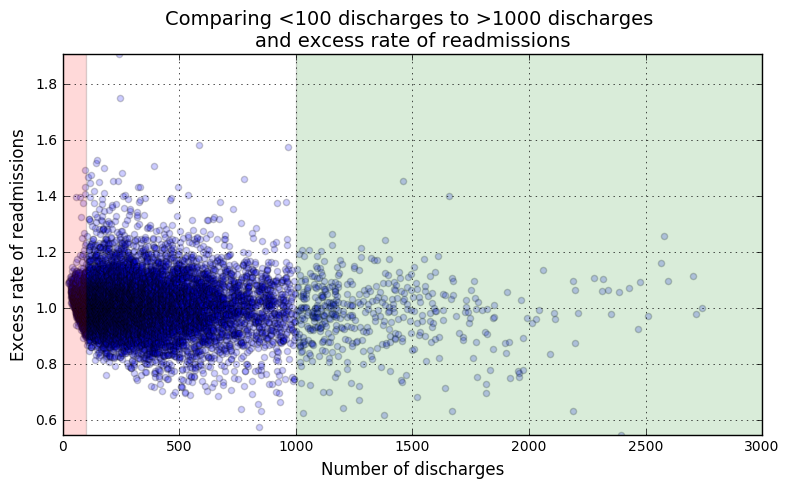

In [26]:
x = [a for a in clean_hospital_read_df['Number of Discharges']]#[81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'])#[81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,100], min(y), max(y), facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([1000,3000], min(y), max(y), facecolor='green', alpha = .15, interpolate=True)

ax.set_ylim([min(y),max(y)])
ax.set_xlim([0, 3000])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Comparing <100 discharges to >1000 discharges \nand excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

This plot aims to show the same information while narrowing in on the areas of < 100 discharges and > 1000 discharges as explored in the inital analysis.